# Exploring Jupyter Notebooks


In [1]:
msg = "Hello World"
print(msg)

Hello World


In [2]:
print("Enter insert mode with cell selected | Enter")

Enter insert mode with cell selected | Enter


## Starting Plot

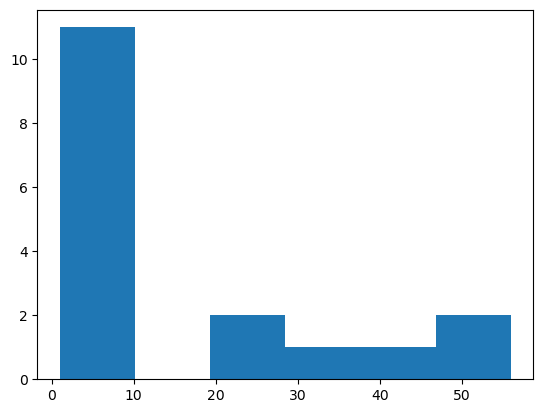

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 46, 30, 5, 6, 7, 8, 9, 10, 25, 47, 23, 3, 56]
number_of_bins = 6
plt.hist(x, number_of_bins)
plt.show()

## Data Science in VS Code Tutorial

Following: https://code.visualstudio.com/docs/datascience/data-science-tutorial

### Prepare Data

Look at Titanic data related to survival of passengers and check correlations whether a given passenger would have survived the sinking of the Titanic.

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("titanic3.csv")
# Can view top 5 rows of data with data.head() or in VS Code variables --> data viewer
data.head()

# Column descriptions:
## From https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca
## Survived: if passenger survived (0 = No, 1 = Yes)
## Pclass: Passenger ticket class
## Sex: male or female
## Age: age in years
## SibSp: # of siblings / spouses aboard the Titanic
## Parch: # of parents / children aboard of passenger on the Titanic
## Fare: Cost of ticket
## Embarked: Where passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# Replace any ? in values with NaN to 
# to help with graphing
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

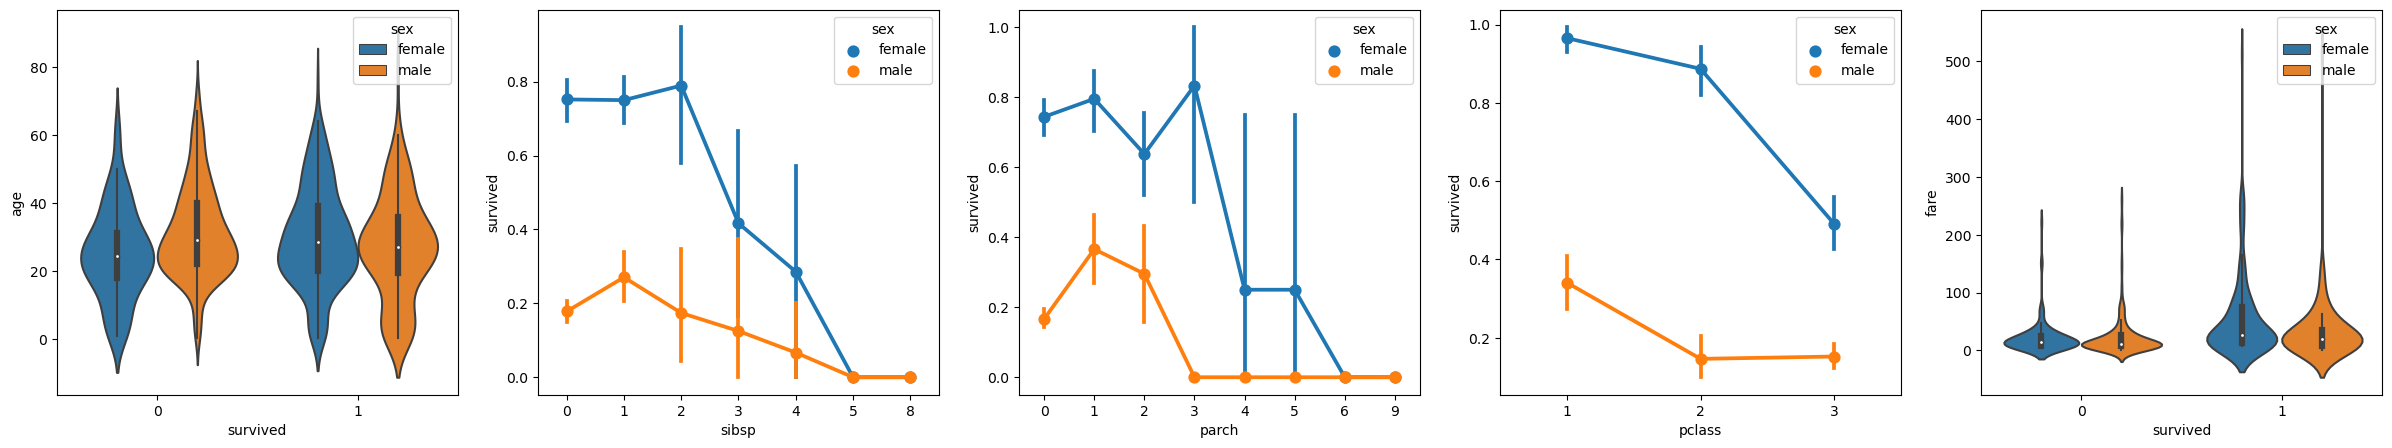

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# View how certain columns of the dataset relate to survivability.

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
# Convert sex to integer values
# to correlate with survivability
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

C:\Users\justi\AppData\Local\Temp\ipykernel_18988\3603728148.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [8]:
# Create new column relatives 
# where column indicates if passenger has relatives on board
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

C:\Users\justi\AppData\Local\Temp\ipykernel_18988\1998849189.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [9]:
# Drop NaN vlaues and low correlation columns of sibsp and parch
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

### Train and evaluate a model

- Divide data into training and test/validation data
- Holding back some data provides a way to check the accuracy of the model

In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
# Normalize data so that all values are between a single rangle (e.g. 0 to 1 / 0 to 100)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
# Model data using Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
# Check model accuracy
# Result should be around 74-5% accuracy
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


### Using a Neural Network

A network using weights and activation functions to determine output from inputs.

In [14]:
from keras.models import Sequential
from keras.layers import Dense

# Use sequential neural network, multiple layers feed into each other in sequence
model = Sequential()

In [15]:
# Add 3 layers
# Layer 1: 5 dimensions for 5 inputs of sex, pclass, age, relatives, fare
# rectified linear unit (relu) is used for activation function for first two layers
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
# Layer 2: 5 to make it simple, could be varied
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
# Layer 3: 1 dimension for 1 output of survived
# sigmoid is used for activation function for last layer to output 1 or 0 (survived or not)
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# View model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile model
# Define optimizer, loss function, and metric to optimize for
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5885
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.5885
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6687
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7667
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7703
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7739
Epoch 11/50
27/27 [

In [17]:
# Check model against test data
# Neural network should be better than earlier Naive Bayes model
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.8038277511961722
